In [51]:
import warnings
warnings.simplefilter("ignore") 

In [52]:
import pandas as pd

houseData = pd.read_csv("data/Lasso/house_data.csv", sep=",")
houseData.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [53]:
print(houseData.shape)

(21613, 21)


In [54]:
houseData = houseData.drop(columns=['id','waterfront','view','date'])
print(houseData.shape)
print(houseData['bedrooms'].describe())

(21613, 17)
count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


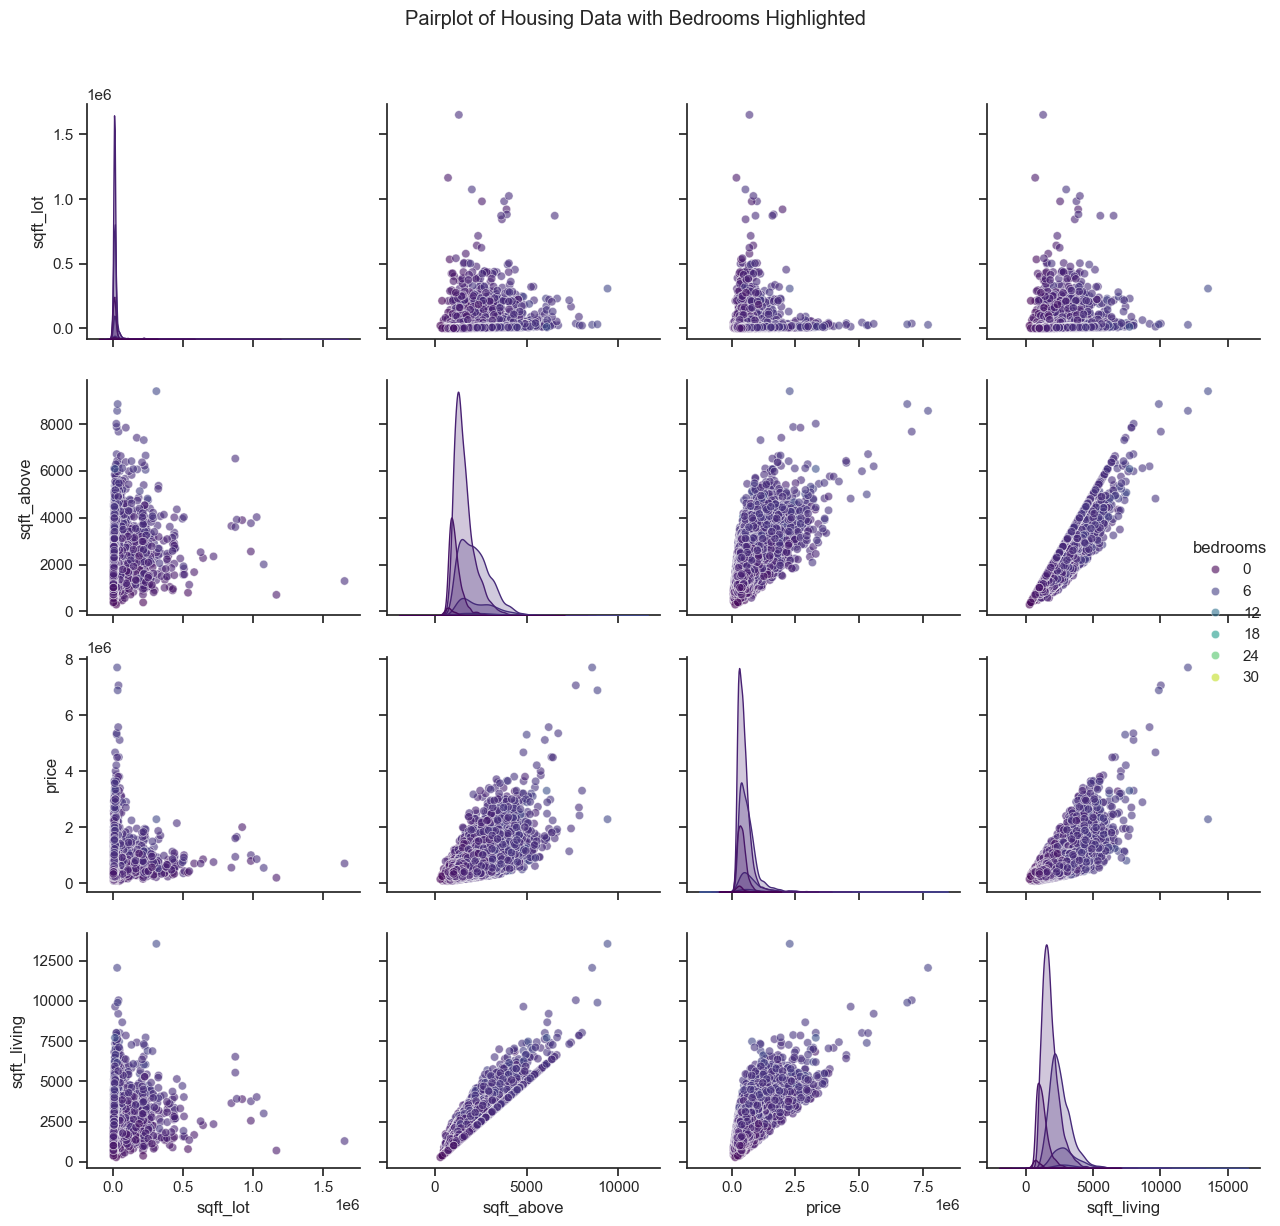

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_to_plot = ['sqft_lot','sqft_above','price','sqft_living','bedrooms']

sns.set_theme(style="ticks", font_scale=1)
g = sns.pairplot(houseData[columns_to_plot], 
                 hue='bedrooms', 
                 palette='viridis', 
                 height=3,
                 plot_kws={'alpha': 0.6})


plt.suptitle("Pairplot of Housing Data with Bedrooms Highlighted", y=1.02)
plt.tight_layout()
plt.show()

In [56]:

target_vector = houseData['price']
print("taille du vecteur cible :", target_vector.size)

taille du vecteur cible : 21613


In [57]:
houseData = houseData.drop(columns=['price'])

In [60]:
columns_to_predict = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'lat',
    'long',
    'sqft_living15',
    'sqft_lot15'
]

predicator = houseData[columns_to_predict]

print(predicator.columns)

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


In [ ]:
from skleran.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = houseData
y = houseData['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer le modèle Lasso avec alpha = 0.2
lasso_model = Lasso(alpha=0.2)

# Entraîner le modèle
lasso_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = lasso_model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("Coefficients:", lasso_model.coef_)